<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [87]:
data = pd.read_csv('./train.csv')

In [6]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [7]:
rows = sorted(np.random.randint(0, data.shape[0], 10))
rows

[548, 1957, 3606, 3644, 3937, 4169, 4386, 4615, 4661, 4665]

In [8]:
data.iloc[rows]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
548,65,100.15,6643.5,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
1957,12,20.45,255.35,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3606,7,75.70,554.05,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,0
3644,1,48.60,48.6,Female,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
3937,1,61.15,61.15,Male,0,No,No,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,0
4169,58,55.50,3166.9,Female,0,Yes,Yes,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
4386,47,100.50,4707.1,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
4615,1,69.75,69.75,Male,0,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),1
4661,62,60.15,3753.2,Male,0,Yes,No,Yes,No,DSL,No,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),0
4665,2,91.15,168.5,Female,0,No,No,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0


In [9]:
data.isna().sum(axis = 0) #-> no Nan's

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [19]:
data.notnull().all()

ClientPeriod                True
MonthlySpending             True
TotalSpent                  True
Sex                         True
IsSeniorCitizen             True
HasPartner                  True
HasChild                    True
HasPhoneService             True
HasMultiplePhoneNumbers     True
HasInternetService          True
HasOnlineSecurityService    True
HasOnlineBackup             True
HasDeviceProtection         True
HasTechSupportAccess        True
HasOnlineTV                 True
HasMovieSubscription        True
HasContractPhone            True
IsBillingPaperless          True
PaymentMethod               True
Churn                       True
dtype: bool

In [20]:
data.isna().any(axis = 0)

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

In [21]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [22]:
data[target_col].sum() / data.shape[0]

0.26202196137826583

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (10, 10))
for j in range(3):
    axes[j].hist(data[num_cols[j]])
    axes[j].set_ylabel('count')
    axes[j].set_xlabel(num_cols[j])

In [ ]:
for fea in cat_cols:
    print(data[fea].value_counts())
    print()

In [ ]:
fig1, axes1 = plt.subplots(nrows = data.shape[1], ncols = 1)

In [ ]:
fig, ax = plt.subplots()

print(list(data['Churn'].value_counts()))
print(list(data['Churn'].value_counts().index))
ax.bar((data['Churn'].value_counts().index), (data['Churn'].value_counts()))
plt.show()

In [27]:
from tqdm import tqdm
print(data.shape[1])

20


In [ ]:
fig1, axes1 = plt.subplots(nrows=5, ncols=4, figsize = (30, 30))
for id, j in tqdm(enumerate(data.columns)):
    lst1 = (data[j].value_counts().index)
    lst2 = (data[j].value_counts())
    axes1[id // 4][id % 4].bar(lst1, lst2)
    axes1[id // 4][id % 4].set_xlabel(j) 
plt.show()

In [ ]:
fig2, axes2 = plt.subplots(nrows=5, ncols=4, figsize = (30, 30))
for id, j in tqdm(enumerate(data.columns)):
    lst1 = (data[j].value_counts().index)
    lst2 = (data[j].value_counts())
    axes2[id // 4][id % 4].pie(lst2, labels = lst1)
    axes2[id // 4][id % 4].set_xlabel(j) 
plt.show()

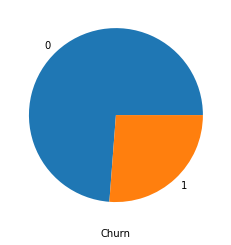

In [30]:
fig3, ax3 = plt.subplots()
ax3.pie(data[target_col].value_counts(), labels = data[target_col].value_counts().index)
ax3.set_xlabel(target_col)
plt.show()
#целевая переменная не сбалансирована, классы не сбалансированны(примерное соотношение: 1/4 : 3/4)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [83]:
# было 9 пропусков в столбце TotalSpent # numbers of these strings
data['TotalSpent'][data['TotalSpent'] == ' ']

1048     
1707     
2543     
3078     
3697     
4002     
4326     
4551     
4598     
Name: TotalSpent, dtype: object

In [88]:
data = data[data['TotalSpent'] != ' ']

In [92]:
data['TotalSpent'].value_counts()

20.2       9
19.75      8
19.65      6
20.05      6
19.9       5
          ..
4554.85    1
1054.8     1
1759.4     1
4997.5     1
1629.2     1
Name: TotalSpent, Length: 4977, dtype: int64

In [97]:
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [99]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
data.info()

In [ ]:
categorial_data = data[cat_cols]
categorial_data.head()

In [ ]:
dummy_features = pd.get_dummies(categorial_data)
dummy_features.head()

In [ ]:
numeric_data = data[num_cols]
numeric_data.head()

In [ ]:
X = pd.concat([numeric_data, dummy_features], axis = 1)
y = data['Churn']
X.head()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
X.info()

In [124]:
X_train = X_train.astype(float)

array([[6.90000e+01, 2.46000e+01, 1.67805e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.20000e+01, 5.06000e+01, 1.07330e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [4.50000e+01, 5.46500e+01, 2.55370e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.30000e+01, 3.08500e+01, 3.94100e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.60000e+01, 7.28000e+01, 3.24940e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.80000e+01, 5.44500e+01, 3.67495e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [125]:
y_train = y_train.astype(float)

In [107]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
#logistic_clf = LogisticRegression(n_jobs=-1)
logistic_clf = LogisticRegressionCV(n_jobs=-1, scoring='roc_auc', refit=True)

In [137]:
logistic_clf.fit(X_train, y_train.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=0)

In [141]:
from sklearn.metrics import accuracy_score, f1_score
y_test_pred = logistic_clf.predict(X_test)
y_train_pred = logistic_clf.predict(X_train)

In [142]:
accuracy_score(y_train_pred, y_train), f1_score(y_train_pred, y_train, average='macro')

(0.80891417733523, 0.7367885130835087)

In [143]:
accuracy_score(y_test_pred, y_test), f1_score(y_test_pred, y_test, average='macro')

(0.8037914691943128, 0.7244940826498829)

In [144]:
logistic_clf.score(X_train, y_train)

0.8484030277721223

In [145]:
logistic_clf.score(X_test, y_test)

0.8437461665487144

In [63]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: ignored

In [ ]:
y_train

In [ ]:
X = pd.concat([numeric_data, dummy_features], axis = 1)
y = data['Churn']
X.head()

In [49]:
print(X.shape, data.shape)

(5282, 45) (5282, 20)


In [ ]:
log_cls = make_pipeline(
    StandardScaler(),
    
)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.